# EE 564 Project 2

## Tesla Model S Motor Design


[Tesla Model S](http://www.teslamotors.com/models)

[RWD 85 Model](http://en.wikipedia.org/wiki/Tesla_Model_S#Powertrain)

* Max. Power: 360 hp (270 kW)
* Max. Torque: 441 Nm
* Top Speed: 225 km/h 

[Specs1](http://teslatap.com/undocumented/) and [Specs2](http://my.teslamotors.com/it_IT/forum/forums/tesla-model-s-motor-output)

**Useful Links:**

* [How does Tesla make their motors in the model S so small?](http://www.reddit.com/r/AskEngineers/comments/2mv2h5/how_does_tesla_make_their_motors_in_the_model_s/)

* [Tesla Motor Technology](http://my.teslamotors.com/roadster/technology/motor)

* [Electric traction machine choice](http://sites.ieee.org/miami/files/2014/11/Hendershot-FIU-Lecture.pdf)

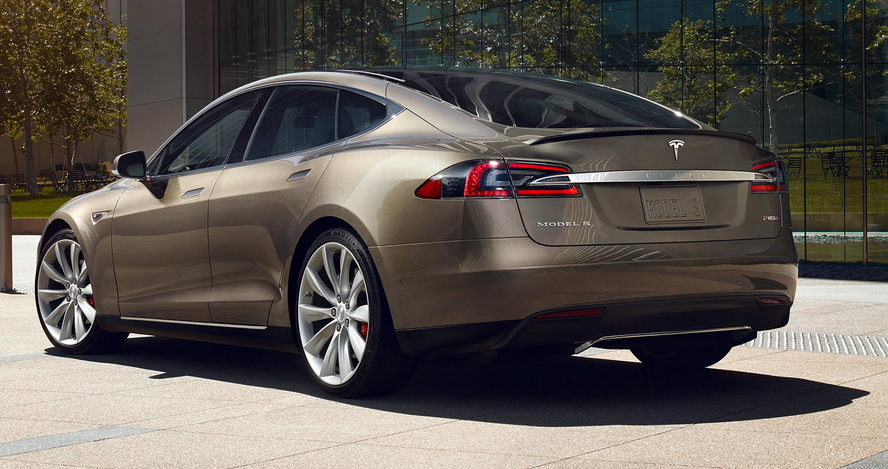

In [4]:
from IPython.display import Image
Image(filename='image/models.png')

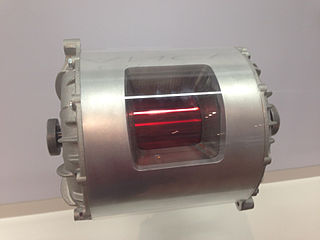

In [5]:
from IPython.display import Image
Image(filename='image/cutout.jpg')

## Design Specifications

From [Specs1](http://teslatap.com/undocumented/): "Motor Inverter – This converts the DC battery voltage to AC, powering the motor. It delivers up to 1000 amps (from 2010 10K annual report)."

Therefore, the motor will be designed to carry a phase current of 1000 A in this design.

In [6]:
import math
Pn=270e3 # Max. power (W)
Iline=1000.0 # Max. current (A)
Vll=Pn/(math.sqrt(3)*Iline) # Max. L-L voltage (V)
Vln=Vll/math.sqrt(3) # Max. L-N voltage (V)
print Vll
print Vln

155.884572681
90.0


In [7]:
Vll=200.0 # Design motor with 200 V rating
Vln=Vll/math.sqrt(3)
f1=60.0 # Supply frequency (Hz)
m=3.0 # Number of phases, Star-connected
nn=0.96 # Target efficiency
cosphin=0.83 # Target power factor

From [Electric traction machine choice](http://sites.ieee.org/miami/files/2014/11/Hendershot-FIU-Lecture.pdf) Slide 38;

In [8]:
p1=2.0 # Number of pole pairs

## Main Dimensions of Stator Core

Reference: I. Boldea and S.A. Nasar, "The Induction Machine Handbook", CRC Press LLC, 2002.

Equation, figure and table numbers are given as comments next to the equation.

In [9]:
KE=0.98-0.005*p1 # Eq. 15.1
Sgap=KE*Pn/(nn*cosphin) # Apparent power (VA), Eq. 15.2
print KE
print Sgap

0.97
328689.759036


$D_{is}^2*L$ output constant concept will be utilized.

In [10]:
C0=250e3 # Esson's constant (J/m^3), Fig. 14.14
lambda1=1.5 # Stack aspect ratio, Table 15.1
Dis=math.pow((2.0*p1*p1*Sgap)/(math.pi*lambda1*f1*C0),1.0/3.0) # Stator bore diameter (m), Eq. 15.1
print Dis

0.333821719418


In [11]:
tau=math.pi*Dis/(2.0*p1) # Pole pitch (m), Eq. 15.2
L=lambda1*tau # Stack length (m), Eq. 15.2
print tau
print L

0.262182965333
0.393274447999


From [Electric traction machine choice](http://sites.ieee.org/miami/files/2014/11/Hendershot-FIU-Lecture.pdf) Slide 40;

In [12]:
q=4.0 # Number of stator slots per pole per phase
taus=tau/(m*q) # Slot pitch (m), Eq. 15.3
print taus

0.0218485804444


In [13]:
KD=0.62 # Dis/Dout, Table 15.2
Dout=Dis/KD # Stator outer diameter (m), Eq. 15.4
print Dout

0.538422128093


In [14]:
g=(0.1+0.012*math.pow(Pn,1.0/3.0))*1e-3 # Air gap length (m), Eq. 15.5
print g

0.000875596488411


Air gap is seen as moderate and feasible.

## Stator Winding

In [15]:
Ns=2.0*p1*q*m # Number of stator slots, Eq. 15.6
print Ns

48.0


Two-layer winding with chorded coils, y/$\tau$=10/12 is chosen as 10/12=0.83 is close to 0.8, which would reduce the first (5$^{th}$ order) stator mmf space harmonic.

In [16]:
alphaec=2.0*math.pi*p1/Ns # Electrical angle between emfs in neighboring slots (rad), Eq. 15.7
print alphaec

0.261799387799


The distribution of phases in slots will be given by MotorAnalysis software later in this report.

Distribution and pitch factors will now be calculated.

In [17]:
Kq1=math.sin(q*alphaec/2.0)/(q*math.sin(alphaec/2.0)) # Distribution factor, Eq. 15.8
print Kq1

0.957662196943


In [18]:
Ky1=math.sin(math.pi/2.0*10.0/12.0) # Pitch factor, Eq. 15.9
print Ky1

0.965925826289


In [19]:
Kw1=Kq1*Ky1 # Winding factor
print Kw1

0.925030648888


Air gap flux density will be taken from recommended values.

In [20]:
Bg=0.65 # Recommended air gap flux density (T), Eq. 15.11
Kf=1.085
alphai=0.729 # Pole spanning coefficient, Fig. 14.13
phi=alphai*tau*L*Bg # Pole flux (Wb), Eq. 15.10
print phi

0.0488586076188


Magnetic loading is calculated as follows:

In [21]:
Bcap=phi/(math.pi*Dis*L/(2.0*p1)) # Magnetic Loading (T)
print Bcap

0.47385


In [22]:
W1=KE*Vln/(4.0*Kf*Kw1*f1*phi) # Number of turns per phase, Eq. 15.12
print W1

9.51706233954


In [23]:
a1=1.0 # Number of current paths in parallel
ns=a1*W1/(p1*q) # Number of conductors per slot, Eq. 15.13
print ns

1.18963279244


This should be an even number since there are two distinct coils per slot in a double layer winding.

In [24]:
ns=2.0
W1=p1*q*ns
print W1

16.0


In [25]:
Bg=Bg*9.517/16.0 # Actual air gap flux density (T), Eq. 15.15
print Bg

0.386628125


At this point Bg was increased from 0.386 T to 0.45 T in order to satisfy $F_{mtr} \approx F_{mts}$, which will be investigated later.

In [26]:
Bg=0.45

In [27]:
Iln=Pn/(3.0*Vln*cosphin*nn) # Rated current (A), Eq. 15.16
print Iln

978.191344636


Electric loading is calculated as follows:

In [28]:
qcap=m*2*W1*Iln/(math.pi*Dis*L) # Electric Loading (A/m^2)
print qcap

227685.228661


In [29]:
Jcos=6.0 # Current density (A/mm^2), Eq. 15.17
Aco=Iln/(Jcos*a1) # Magnetic wire cross section (mm^2), Eq. 15.18
print Aco

163.031890773


Circular cross section area is to be used. At 60 Hz, skin depth for copper is

\begin{equation}
  \sigma = \sqrt{\frac{2\rho}{\omega*\mu_r*\mu_0}} \cong 9~mm
\end{equation}

In [30]:
dco=math.sqrt(4.0*Aco/math.pi) # Wire gauge diameter (mm), Eq. 15.19
print dco

14.407590027


We can use few conductors in parallel, $a_p$=8.

In [31]:
ap=8.0
dco=math.sqrt(4.0*Aco/(math.pi*ap)) # Wire gauge diameter (mm), Eq. 15.19
print dco

5.09385230431


From [AWG](http://en.wikipedia.org/wiki/American_wire_gauge); AWG4 wire is selected.

## Stator Slot Sizing

The useful slot area will be calculated with a fill factor of 0.44 for round condutor chosen.

In [32]:
Kfill=0.44 # Fill factor for round wire
Asu=math.pi*math.pow(dco,2.0)*ap*ns/(4.0*Kfill) # Useful slot area (mm^2), Eq. 15.21
print Asu

741.054048967


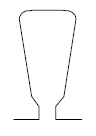

In [33]:
from IPython.display import Image
Image(filename='image/statorslot.png')

Fig. 15.4 (a): Chosen stator slot geometry

For such slot shapes, the stator tooth is rectangular. The variables $b_{os}$, $h_{os}$, and $h_w$ are assigned values from past experience [Boldea].

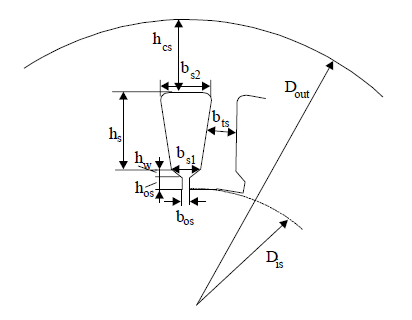

In [34]:
from IPython.display import Image
Image(filename='image/stslgeo.png')

Fig. 15.5: Stator slot geometry

In [35]:
Kfe=0.96 # For 0.5 mm thick lamination
Bts=1.55 # Tooth flux density (T)
bts=Bg*taus*L/(Bts*L*Kfe) # Tooth width (m), Eq. 15.22
print bts

0.00660743360214


In [36]:
bos=2.2e-3 # Fig. 15.5
hos=1e-3 # Fig. 15.5
hw=1.5e-3 # Fig. 15.5
bs1=math.pi*(Dis+2.0*hos+2.0*hw)/Ns-bts # Slot lower width (m), Eq. 15.23
print bs1

0.015568396077


In [37]:
bs2=math.sqrt(4.0*Asu*1e-6*math.tan(math.pi/Ns)+math.pow(bs1,2.0)) # Upper slot width (m), Eq. 15.27
print bs2

0.0208964099888


In [38]:
hs=2.0*Asu*1e-6/(bs1+bs2) # Slot useful height (m), Eq. 15.28
print hs

0.0406448918241


Now the design will be verified by comparing stator tooth and rotor tooth mmfs.

In [39]:
Fmg=1.2*g*Bg/(4.0*math.pi*1e-7) # Air gap mmf (AT), Eq. 15.29
print Fmg

376.259875068


In [40]:
Hts=1760.0 # Magnetic field intensity for Bts=1.55 T (A/m)
Fmts=Hts*(hs+hos+hw) # Stator tooth mmf (AT), Eq. 15.30
print Fmts

75.9350096105


In [41]:
Kst=1.4-1.0 # Teeth saturation factor, Eq. 15.29
Fmtr=Kst*Fmg-Fmts # Rotor tooth mmf (AT), Eq. 15.31
print Fmtr

74.5689404169


At this point, Bg was increased from 0.386 T to 0.45 T in order to satisfy $F_{mtr} \approx F_{mts}$ as mentioned above.

In [42]:
hcs=(Dout-(Dis+2.0*(hos+hw+hs)))/2.0 # Stator back iron height (m), Eq. 15.32
print hcs

0.0591553125135


In [43]:
Bcs=phi/(2.0*L*hcs) # Back core flux density (T), Eq. 15.33
print Bcs

1.05007811508


which is a reasonable value. If this value came out to be large, stator outer diameter could be increased, a larger stack aspect ratio, $\lambda$ could be introduced, or current density could be increased.

## Rotor Slots

From [Electric traction machine choice](http://sites.ieee.org/miami/files/2014/11/Hendershot-FIU-Lecture.pdf) Slide 40; $N_r$ is given to be 68. A combination of $N_s$ = 48 and $N_r$ = 68 is evaluated to be feasible based on past experience given in Table 15.5 in [Boldea], in terms of reducing parasitic torque, additional losses, radial forces, noise and vibration.

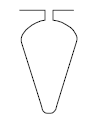

In [44]:
from IPython.display import Image
Image(filename='image/rotorslot.png')

Fig. 15.6 (c): Chosen rotor slot geometry

Rotor bar current, $I_b$ is to be found. If $K_I$ is 1, the rotor and stator mmf would have equal magnitudes. In reality, the stator mmf is slightly larger.

In [45]:
Nr=68.0 # Number of rotor slots
K1=0.8*cosphin+0.2 # Rotor to stator mmf ratio, Eq. 15.35
Ib=K1*(2.0*m*W1*Kw1)/Nr*Iln # Rotor bar current (A), Eq. 15.34
print Ib

1103.71260108


In [46]:
Jb=6.0 # Current density in the rotor bar (A/mm^2)
Ab=Ib/Jb*1e-6 # Rotor slot area (m^2), Eq. 15.36
print Ab

0.00018395210018


In [47]:
Icr=Ib/(2.0*math.sin(math.pi*p1/Nr)) # End ring current (A), Eq. 15.37
print Icr

5980.99179123


In [48]:
Jcr=0.8*Jb # Current density in the end ring (A/mm^2)
Acr=Icr/Jcr*1e-6 # End ring cross section (m^2), Eq. 15.38
print Acr

0.00124603995651


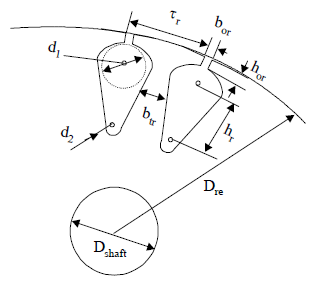

In [49]:
from IPython.display import Image
Image(filename='image/rtslgeo.png')

Fig. 15.7: Rotor slot geometry

In [50]:
hor=0.5e-3 # Fig. 15.7
bor=1.5e-3 # Fig. 15.7
taur=math.pi*(Dis-2.0*g)/Nr # Rotor slot pitch (m), Eq. 15.39
print taur

0.0153416224462


In [51]:
Btr=1.60 # Rotor tooth flux density
btr=Bg/(Kfe*Btr)*taur # Rotor tooth width (m), Eq. 15.40
print btr

0.00449461595103


In [52]:
Dre=Dis-2*g # Rotor diameter (m)
print Dre
d1=(math.pi*(Dre-2.0*hor)-Nr*btr)/(math.pi+Nr) # Rotor slot upper diameter (m), Eq. 15.42
print d1

0.332070526441
0.0103238460319


$d_2$ and $h_r$ are found by solving slot area equations Eq. 15.43-44.

In [53]:
d2=math.sqrt((8.0*math.tan(math.pi/Nr)*Ab-math.pi*math.pow(d1,2.0)*math.tan(math.pi/Nr)-2.0*math.pow(d1,2.0))/(math.pi*math.tan(math.pi/Nr)-2.0))
print d2 # Rotor slot lower diameter (m), Eq. 15.43-44
hr=(d1-d2)/(2*math.tan(math.pi/Nr)) # Rotor slot height (m), Eq 15.43-44
print hr

0.00930548493929
0.0110134072399


Rotor teeth mmf will be calculated here for verification. A second iteration can be taken here to acquire satisfactory mmf value by increasing $B_{tr}$.

In [54]:
Htr=2460.0 # Magnetic field intensity for Bts=1.6 T (A/m)
Fmtr=Htr*(hr+hor+(d1+d2)/2.0) # Rotor teeth mmf (AT), Eq. 15.45
print Fmtr

52.4670589046


In [55]:
Bcr=1.65 # Rotor back core flux density (T)
hcr=phi/2.0*1.0/(L*Bcr) # Rotor back core height (m), Eq. 15.46
print hcr

0.0376470903403


In [56]:
Dshaftmax=Dis-2.0*g-2.0*(hor+(d1+d2)/2.0+hr+hcr) # Maximum diameter of the shaft (m), Eq. 15.47
print Dshaftmax

0.214120200309


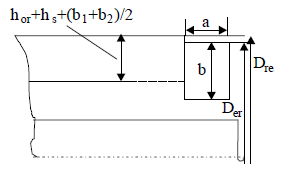

In [57]:
from IPython.display import Image
Image(filename='image/endringcs.png')

Fig. 15.8: End ring cross-section

In [58]:
Dcr=Dre-3.5e-3 # End ring diameter (m)
print Dcr

0.328570526441


In [59]:
b=1.0*(hr+hor+(d1+d2)/2.0) # End ring height (m), Fig. 15.8, Eq. 15.49
print b

0.0213280727255


In [60]:
a=Acr/b # End ring width (m), Fig. 15.8, Eq. 15.51
print a

0.0584225294308


## Magnetization Current

Carter's coefficient, $K_c$ will now be computed.

In [61]:
gama1=math.pow(bos,2.0)/(5.0*g+bos) # (m), Eq. 15.53
print gama1

0.000735787917136


In [62]:
gama2=math.pow(bor,2.0)/(5.0*g+bor) # (m), Eq. 15.54
print gama2

0.000382784403012


In [63]:
Kc1=taus/(taus-gama1) # Eq. 15.55
print Kc1

1.03485033617


In [64]:
Kc2=taur/(taur-gama2) # Eq. 15.56
print Kc2

1.02558918025


In [65]:
Kc=Kc1*Kc2 # Total Carter coefficient, Eq. 15.57
print Kc

1.06133130796


Back core mmfs are calculated as follows:

In [66]:
Hcs=237.0 # Stator back core flux intensity (A/m), Table 15.4
Hcr=3460.0 # Rotor back core flux intensity (A/m), Table 15.4
Fmcs=0.88*math.exp(-0.4*math.pow(Bcs,2.0))*(math.pi*(Dout-hcs)/(2.0*p1))*Hcs # Stator back core mmf (AT), Eq. 15.58,60
Fmcr=0.88*math.exp(-0.4*math.pow(Bcr,2.0))*(math.pi*(Dshaftmax+hcr)/(2.0*p1))*Hcr # Rotor back core mmf (AT), Eq. 15.59,60
print Fmcs
print Fmcr

50.5063395907
202.628844501


In [67]:
F1m=2.0*(Kc*g*Bg/(4.0*math.pi*1e-7)+Fmts+Fmtr+Fmcs+Fmcr) # Magnetization mmf (AT), Eq. 15.52
print F1m

1428.63514744


In [68]:
Ks=F1m/(2.0*Fmg)-1.0 # Total saturation factor
print Ks

0.898468641102


The magnetization current is found as,

In [69]:
Imu=(math.pi*p1*(F1m/2.0))/(3.0*math.sqrt(2.0)*W1*Kw1) # Magnetization current (A), Eq. 15.62
print Imu

71.4757704815


In [70]:
imu=Imu/Iln # Relative (p.u.) value of Imu, Eq. 15.62'
print imu

0.0730693139675


## Resistances and Inductances

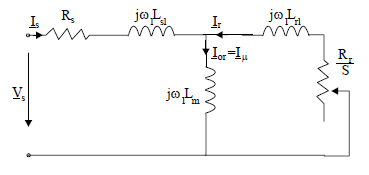

In [71]:
from IPython.display import Image
Image(filename='image/circuit.png')

Fig. 15.9: T equivalent circuit (core loss not evident)

Stator phase resistance is calculated as,

In [72]:
rhoco20=1.78e-8 # Copper resistivity at 20 *C (ohm.m)
rhoco80=rhoco20*(1.0+1.0/273.0*(80.0-20.0)) # Copper resistivity at 80 *C (ohm.m), Eq. 15.69
y=10.0/12.0*tau # Coil span (m), Eq. 15.67
lend=2.0*y-0.02 # End connection length (m), Eq. 15.68
lc=2.0*(L+lend) # Coil length (m), Eq. 15.64
Rs=rhoco80*lc*W1/(Aco*1e-6*a1) # Stator phase resistance (ohm), Eq. 15.63
print Rs

0.00345299482877


Rotor bar/end ring segment equivalent resistance is calculated as,

In [73]:
rhoal20=3.1e-8 # Cast aluminium resistivity at 20 *C (ohm.m)
rhoal80=rhoal20*(1.0+1.0/273.0*(80.0-20.0)) # Cast aluminium resistivity at 80 *C (ohm.m)
lcr=math.pi*(Dcr-b)/Nr # End ring segment length (m), Eq. 15.71
betas=math.sqrt(2.0*math.pi*f1*4.0*math.pi*1e-7/(2.0*rhoal20)) # (m^-1), Eq. 15.73
s=1.0
ksi=betas*hr*math.sqrt(s) # Eq. 15.73
KR=ksi*(math.sinh(2.0*ksi)+math.sin(2.0*ksi))/(math.cosh(2.0*ksi)-math.cos(2.0*ksi)) # Skin effect resistance coefficient for the bar, Eq. 15.72
Rbc=rhoal80*(L/Ab*KR+lcr/(2.0*Acr*math.pow(math.sin(math.pi*p1/Nr),2.0))) # Rotor bar/end ring segment equivalent resistance (ohm), Eq. 15.70
print Rbc

0.0001121176176


In [74]:
Rrprime=4.0*m/Nr*math.pow(W1*Kw1,2.0)*Rbc # Rotor cage resistance reduced to the stator (ohm), Eq. 15.74
print Rrprime

0.00433409477794


Stator phase leakage reactance is calculated as,

In [75]:
beta=10.0/12.0 # y/tau, Eq. 15.75
lambdas=(2.0/3.0*hs/(bs1+bs2)+2.0*hw/(bos+bs1)+hos/bos)*(1.0+3.0*beta)/4.0 # Stator slot connection coefficient, Eq. 15.76
Cs=1.0-0.033*math.pow(bos,2.0)/(g*taus) # Eq. 15.77
phi1=math.pi*(6.0*beta-5.5) # Eq. 15.78
gamads=(0.14*math.sin(phi1)+0.76)*1e-2 # Eq. 15.78
lambdads=0.9*taus*math.pow(q,2.0)*math.pow(Kw1,2.0)*Cs*gamads/(Kc*g*(1.0+Kst)) # Stator differential connection coefficient, Eq. 15.77
lambdaec=0.34*q/L*(lend-0.64*beta*tau) # Stator end connection specific geometric permeance coefficient, Eq. 15.79
Xs1=2.0*4.0*math.pi*1e-7*2.0*math.pi*f1*L*math.pow(W1,2.0)/(p1*q)*(lambdas+lambdads+lambdaec) # Stator phase reactance (ohm), Eq. 15.75
print Xs1

0.0408545446755


Equivalent rotor bar leakage reactance is calculated as,

In [76]:
lambdar=0.66+2.0*hr/(3.0*(d1+d2))+hor/bor # Rotor slot connection coefficient, Eq. 15.81
gamadr=9.0*math.pow(6.0*p1/Nr,2.0)*1e-2 # Eq. 15.82
lambdadr=0.9*taur*gamadr/(Kc*g)*math.pow(Nr/(6.0*p1),2.0) # Rotor differential connection coefficient, Eq. 15.82
lambdaer=2.3*(Dcr-b)/(Nr*L*4.0*math.pow(math.sin(math.pi*p1/Nr),2.0))*math.log10(4.7*(Dcr-b)/(b+2*a)) # Stator end ring permeance coefficient, Eq. 15.83
Kx=3.0/(2.0*ksi)*(math.sinh(2.0*ksi)-math.sin(2.0*ksi))/(math.cosh(2.0*ksi)-math.cos(2.0*ksi)) # Skin effect coefficient for the leakage reactance, Eq. 15.84
Xbc=2.0*math.pi*f1*4.0*math.pi*1e-7*L*(lambdar*Kx+lambdadr+lambdaer) # Equivalent rotor bar leakage reactance (ohm), Eq. 15.80
print Xbc

0.000645860732489


In [77]:
Xr1=4.0*m*math.pow(W1*Kw1,2.0)/Nr*Xbc # Rotor leakage reactance (ohm), Eq. 15.85
print Xr1

0.0249668311536


For zero speed (S=1), both stator and rotor leakage reactances are reduced due to leakage flux path saturation:

In [78]:
Xs1sat=Xs1*0.75 # Stator leakage reactance at zero speed due to leakage flux path saturation (ohm), Eq. 15.86
Xr1sat=Xr1*0.65 # Rotor leakage reactance at zero speed due to leakage flux path saturation (ohm), Eq. 15.86
print Xs1sat
print Xr1sat

0.0306409085066
0.0162284402498


For rated slip, both skin and leakage saturation effects have to be eliminated ($K_R$ = $K_X$ = 1)

In [79]:
RbcSn=rhoal80*(L/Ab+lcr/(2.0*Acr*math.pow(math.sin(math.pi*p1/Nr),2.0))) # Rotor bar/end ring segment equivalent resistance (ohm), Eq. 15.70
print RbcSn

0.000106140163165


In [80]:
RrprimeSn=Rrprime*RbcSn/Rbc # Rotor resistance at rated speed (ohm), Eq. 15.87
print RrprimeSn

0.00410302623932


In [81]:
XbcSn=2.0*math.pi*f1*4.0*math.pi*1e-7*L*(lambdar+lambdadr+lambdaer) # Equivalent rotor bar leakage reactance (ohm), Eq. 15.80
print XbcSn

0.000651232053645


In [82]:
Xr1Sn=Xr1*XbcSn/Xbc # Rotor leakage reactance at rated speed (ohm)
print Xr1Sn

0.0251744685925


In [83]:
Xm=math.sqrt(math.pow(Vln/Imu,2.0)-math.pow(Rs,2.0))-Xs1 # Magnetization reactance (ohm), Eq. 15.88
print Xm

1.57465500911


Here, the effect of skewing on reactances will be considered. It is typical to make a skewing $c$ of one stator slot pitch $\tau_s$.

In [84]:
Kskew=math.sin(math.pi/2.0*taus/tau)/(math.pi/2.0*taus/tau) # Skewing factor, Eq. 15.90
print Kskew

0.99714665735


In [85]:
Xm=Xm*Kskew # Magnetization reactance with skewing (ohm), Eq. 15.89
print Xm

1.57016197881


In [86]:
Xr1skew=Xm*(1.0-math.pow(Kskew,2.0)) # Rotor leakage inductance augmentation term (ohm), Eq. 15.91
print Xr1skew

0.00894763670955


In [87]:
Xr1S1skew=Xr1sat+Xr1skew # Final value of rotor leakage reactance at S=1 (ohm), Eq. 15.92
print Xr1S1skew

0.0251760769594


In [88]:
Xr1Snskew=Xr1+Xr1skew # Final value of rotor leakage reactance at S=Sn (ohm), Eq. 15.93
print Xr1Snskew

0.0339144678632


## Losses and Efficiency

The efficiency is defined as output per input power:

\begin{equation}
  \eta = \frac{P_{out}}{P_{in}} = \frac{P_{out}}{P_{out}+\sum losses}
\end{equation}

The loss components are

\begin{equation}
  \sum losses = p_{Co}+p_{Al}+p_{iron}+p_{mv}+p_{stray}
\end{equation}

Now each of these components will be calculated.

In [89]:
pco=3.0*Rs*math.pow(Iln,2.0) # Stator winding losses (W), Eq. 15.96
print pco

9912.0803549


In [90]:
pA1=3.0*RrprimeSn*math.pow(K1,2.0)*math.pow(Iln,2.0) # Rotor cage losses (W), Eq. 15.97
print pA1

8792.26289757


In [91]:
pmv=0.012*Pn # Mechanical/ventilation losses for p1=2 (W)
print pmv

3240.0


In [92]:
pstray=0.01*Pn # Stray losses (W)
print pstray

2700.0


The core loss $p_{iron}$ is made of fundamental $p_{iron}^1$ and additional (harmonics) $p_{iron}^h$ iron loss. The fundamental core losses occur only in the teeth and back iron ($p_{t1}$, $p_{y1}$) of the stator as the rotor (slip) frequency is low.

In [93]:
gamairon=7650 # Iron density (kg/m^3)
Gt1=gamairon*Ns*bts*(hs+hw+hos)*L*Kfe # Stator tooth weight (kg), Eq. 15.99
print Gt1

39.5213551548


In [94]:
Kt=1.7 # Core loss augmentation due to mechanical machining
p10=2 # Specific losses (W/kg) at 1.0 T and 50 Hz
pt1=Kt*p10*math.pow(f1/50.0,1.3)*math.pow(Bts,1.7)*Gt1 # Stator teeth fundamental losses (W), Eq. 15.98
print pt1

358.765151627


In [95]:
Ky=1.6 # Influence of mechanical machining
Gy1=gamairon*math.pi/4.0*(math.pow(Dout,2.0)-math.pow(Dout-2.0*hcs,2.0))*L*Kfe # Yoke weight (kg), Eq. 15.101
print Gy1

257.246446075


In [96]:
py1=Ky*p10*math.pow(f1/50.0,1.3)*math.pow(Bcs,1.7)*Gy1 # Stator back iron (yoke) fundamental losses (W), Eq. 15.100
print py1

1133.73541802


In [97]:
p1iron=pt1+py1 # Fundamental iron losses (W), Eq. 15.102
print p1iron

1492.50056964


The tooth flux pulsation core loss constitutes the main components of stray losses:

In [98]:
Kps=1.0/(2.2-Bts) # Eq. 15.104
Kpr=1.0/(2.2-Btr) # Eq. 15.104
print Kps
print Kpr

1.53846153846
1.66666666667


In [99]:
Bps=(Kc2-1)*Bg # (T), Eq. 15.105
Bpr=(Kc1-1)*Bg # (T), Eq. 15.106
print Bps
print Bpr

0.0115151311124
0.0156826512781


In [100]:
Gtr=gamairon*L*Kfe*Nr*(hr+(d1+d2)/2.0)*btr # Rotor teeth weight (kg), Eq. 15.107
print Gtr

18.3856498664


In [101]:
psiron=0.5e-4*(math.pow(Nr*f1/p1*Kps*Bps,2.0)*Gt1+math.pow(Ns*f1/p1*Kpr*Bpr,2.0)*Gtr) # Tooth flux pulsation core loss (W), Eq. 15.103
print psiron

3.8832103971


In [102]:
piron=p1iron+psiron # Total core loss (W), Eq. 15.108
print piron

1496.38378004


In [103]:
Ploss=pco+pA1+piron+pmv+pstray # Total losses (W), Eq. 15.95
print Ploss

26140.7270325


In [104]:
nnfinal=Pn/(Pn+Ploss) # Final efficiency, Eq. 15.94
print nnfinal

0.911728699749


which is below the target efficiency=0.96.

A larger stator bore diameter can be selected with smaller current densities. A larger size machine would have been obtained, in general.

## Mass Calculation

In [105]:
Gs=Gt1+Gy1 # Stator weight (kg)
print Gs

296.76780123


In [106]:
Gyr=gamairon*math.pi/4.0*(math.pow(Dre-2.0*hor-2.0*(d1+d2)/2.0-2.0*hr,2.0)-math.pow(Dshaftmax,2.0))*L*Kfe # Rotor core weight (kg)
Gr=Gtr+Gyr # Rotor weight (kg)
print Gr

104.387737506


In [107]:
Gws=8960*lc*W1*Aco*1e-6*m # Stator copper weight (kg)
print Gws

113.623649467


In [108]:
Gwr=2700*(Ab*L+lcr*Acr)*Nr # Rotor aluminium weight (kg)
print Gwr

16.5296291319


## Operation Characteristics

In [109]:
I0a=(piron+pmv+3.0*math.pow(Imu,2.0)*Rs)/(3.0*Vln) # No load active current (A), Eq. 15.109
print I0a

13.8255344231


In [110]:
Sn=pA1/(Pn+pA1+pmv+pstray) # Rated slip, Eq. 15.110
print Sn

0.0308790539157


In [111]:
Tn=Pn/(2.0*math.pi*f1/p1*(1.0-Sn)) # Rated shaft torque (Nm), Eq. 15.111
print Tn

1478.03480424


In [112]:
Cm=1.0+Xs1/Xm # Eq. 15.113
Tbk=3.0*p1/(2.0*2.0*math.pi*f1)*math.pow(Vln,2.0)/(Rs+math.sqrt(math.pow(Rs,2.0)+math.pow(Xs1+Cm*Xr1,2.0))) # Breakdown torque (Nm), Eq. 15.114
print Tbk

1515.46655684


In [113]:
ILR=Vln/(math.sqrt(math.pow(Rs+Rrprime,2.0)+math.pow(Xs1sat+Xr1sat,2.0))) # Starting current (A), Eq. 15.115
print ILR

2430.34288071


In [114]:
TLR=3.0*Rrprime*math.pow(ILR,2.0)/(2.0*math.pi*f1)*p1 # Starting torque (Nm), Eq. 15.116
print TLR

407.430592112


In [115]:
cosphinfinal=Pn/(3.0*Vln*Iln*nnfinal) # Rated power factor, Eq. 15.117
print cosphinfinal

0.873944189998


In [116]:
tbk=Tbk/Tn # Eq. 15.118
print tbk

1.02532535262


In [117]:
tLR=TLR/Tn # Eq. 15.119
print tLR

0.275656967579


In [118]:
iLR=ILR/Iln # Eq. 15.120
print iLR

2.48452707544


## Temperature Rise

The temperature differential between the conductors in slots and the slot wall is calculated as follows:

In [119]:
lambdains=0.25 # Insulation thermal conductivity (W/mK)
hins=0.3e-3 # Total insulation thickness from the slot middle to teeth wall (m)
alphacond=lambdains/hins # Slot insulation conductivity plus its thickness lumped into alphacond (W/m^2K), Eq. 15.124
print alphacond

833.333333333


In [120]:
Als=(2.0*hs+bs2)*L*Ns # Stator slot lateral area (m^2), Eq. 15.125
print Als

1.928986507


In [121]:
Kfin=3.0 # Finn area coefficient
Aframe=math.pi*Dout*(L+tau)*Kfin # Frame area (m^2), Eq. 15.126
print Aframe

3.32612454729


In [122]:
delthetaco=pco/(alphacond*Als) # Temperature differential between the conductors in slots and the slot wall (C), Eq. 15.121
print delthetaco

6.16618954189


Here, forced convection is assumed and the coefficient is multiplied by an empirical factor:

In [123]:
alphaconv=50.0*6.0 # For 2p1=4 and forced convection (W/m2K), Eq. 15.123
delthetaframe=Ploss/(alphaconv*Aframe) # Frame temperature rise with respect to ambient air (C), Eq. 15.122
print delthetaframe

26.1973824299


If the ambient temperature is assumed to be 40 $^{\circ}$C, the winding temperature is:

In [124]:
thetaamb=40 # Ambient temperature (C)
thetaco=thetaamb+delthetaco+delthetaframe # Winding temperature (C), Eq. 15.127
print thetaco

72.3635719718


which is smaller than 80 $^{\circ}$C and can be seen as satisfactory.

## MotorAnalysis Simulation

The designed motor was simulated with MotorAnalysis software. The parameters of the simulation are edited as follows.

### Geometry Editor

Stator dimensions:

Slot type: Parallel tooth

Number of winding layers: Double layer

In [125]:
print Ns # Number of slots
D1s=Dout # Stator outer diameter (m)
print D1s
D2s=Dis # Stator bore diameter (m)
print Dis
Sds=hs+hw+hos # Slot depth (m)
print Sds
Ws=bts # Tooth width (m)
print Ws
Ods=hos # Slot opening depth (m)
print Ods
Ows=bos # Slot opening width (m)
print Ows
Tas=math.atan(hw/((bs1-bos)/2.0))*400.0/(2.0*math.pi) # Tooth tip angle (grad)
print Tas
Rcs=(bs2-bs1)/2.0*math.sqrt(2.0)/2.0 # Approximate slot corner radius (mm)
print Rcs

48.0
0.538422128093
0.333821719418
0.0431448918241
0.00660743360214
0.001
0.0022
14.0535517929
0.00188373738365


Rotor dimensions:

Slot type: Parallel tooth

In [126]:
print Nr # Number of bars
lag=g # Air gap length (m)
print lag
Dshaft=Dshaftmax # Shaft diameter (m)
print Dshaft
Tar=45.0*400.0/360.0 # Tooth tip angle (grad)
print Tar
Sdr=hor+d1/2.0+hr+d2/2.0 # Slot depth (m)
print Sdr
Wr=btr # Tooth width (m)
print Wr
Odr=hor # Slot opening width (m)
print Odr
Owr=bor # Slot opening width (m)
print Owr
Rcr=d2/2 # Slot corner radius (m)
print Rcr

68.0
0.000875596488411
0.214120200309
50.0
0.0213280727255
0.00449461595103
0.0005
0.0015
0.00465274246964


Axial dimensions:

In [127]:
l=L # Lamination length (m)
print l
RBskew=math.atan(taus/L)*200.0/math.pi # Rotor bar skew (grad)
print RBskew

0.393274447999
3.53314457763


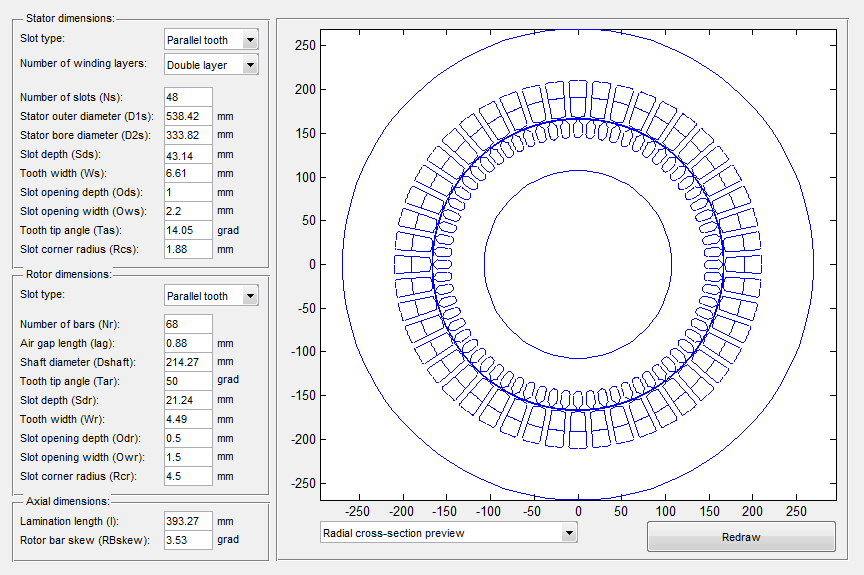

In [128]:
from IPython.display import Image
Image(filename='image/geometry.png')

### Windings Property Editor

Stator winding:

Stator circuit: Delta connection

In [129]:
print Ns # Number of slots
layer=2 # Number of winding layers
print layer
Npp=1 # Number of parallel paths
print Npp
Lsew=Xs1/(lambdas+lambdads+lambdaec)*lambdaec/(2.0*math.pi*f1) # End winding inductance (H)
print Lsew
print Rs # Winding phase resistance (ohm)
W=4 # Number of conductors per slot
print W
fillfactor=Kfill # Slot fill factor
print fillfactor
ks=1/rhoco80 # Winding material conductivity (S/m)
print ks

48.0
2
1
3.03130088717e-05
0.00345299482877
4
0.44
46057293.2483


Winding Layout:

Two-layer winding with chorded coils, y/$\tau$=10/12 is chosen as 10/12=0.83 is close to 0.8, which would reduce the first (5$^{th}$ order) stator mmf space harmonic.

Rotor winding:

In [130]:
print Nr # Number of bars
print RBskew # Rotor bar skew (grad)
kr=1/rhoal80 # Bar material conductivity (S/m)
print kr
Rre=Rbc # End ring resistance (ohm)
print Rre

68.0
3.53314457763
26445800.6393
0.0001121176176


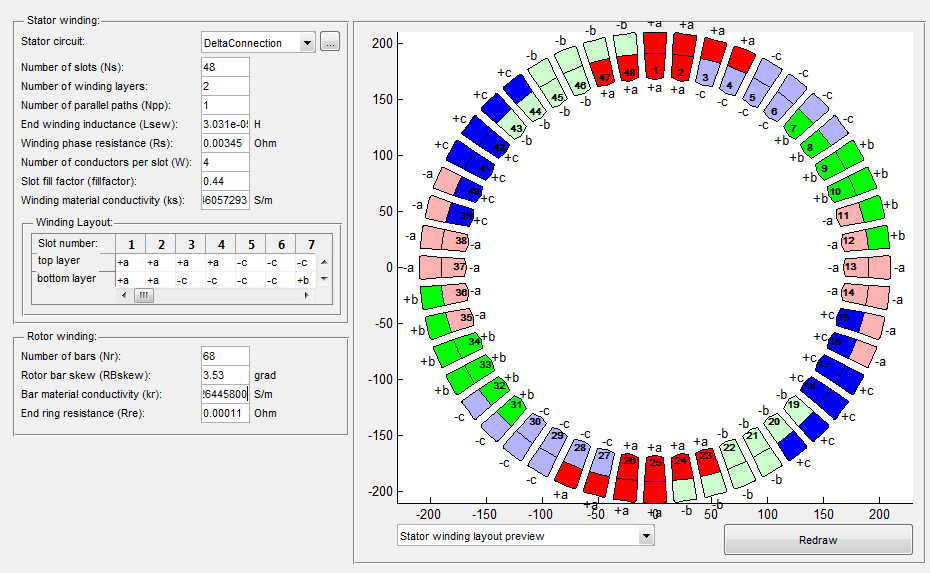

In [131]:
from IPython.display import Image
Image(filename='image/winding.png')

### Iron Core Property Editor

Core material: NO20 Sura

In [141]:
mu_lin=(1.0-0.1)/(91.0-29.0)/(4.0*math.pi*1e-7) # Linear relative permeability
print mu_lin
k_st=0.95 # Stacking factor
print k_st

11551.5684502
0.95


BH-curve points are taken from NO20 Sura catalog.

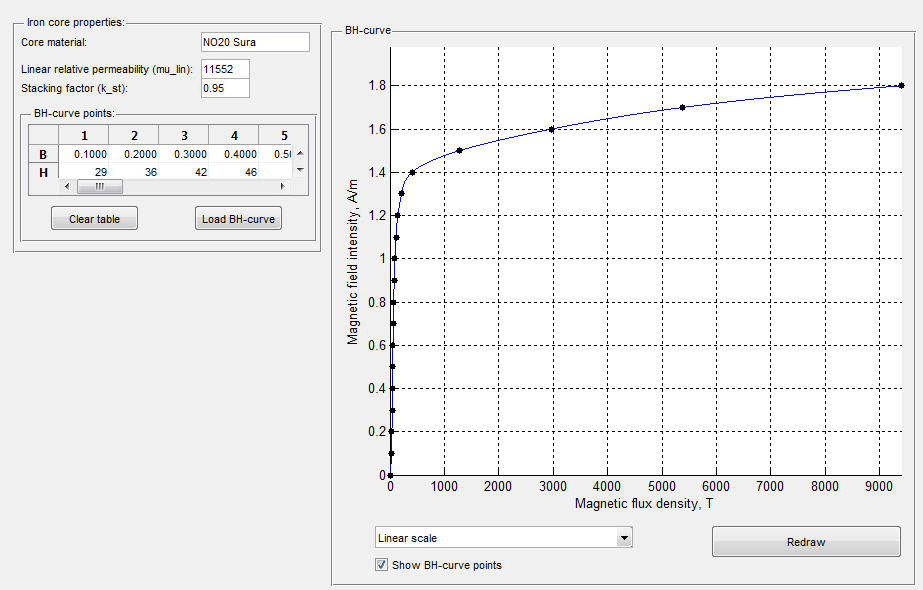

In [142]:
from IPython.display import Image
Image(filename='image/core.png')

### Mesh Editor

Number of layers in air gap: 3

Air gap sliding layer number: 2

Mesh growth rate: 1.5

Number of refinemesh calls: 1

Number of slices: 3

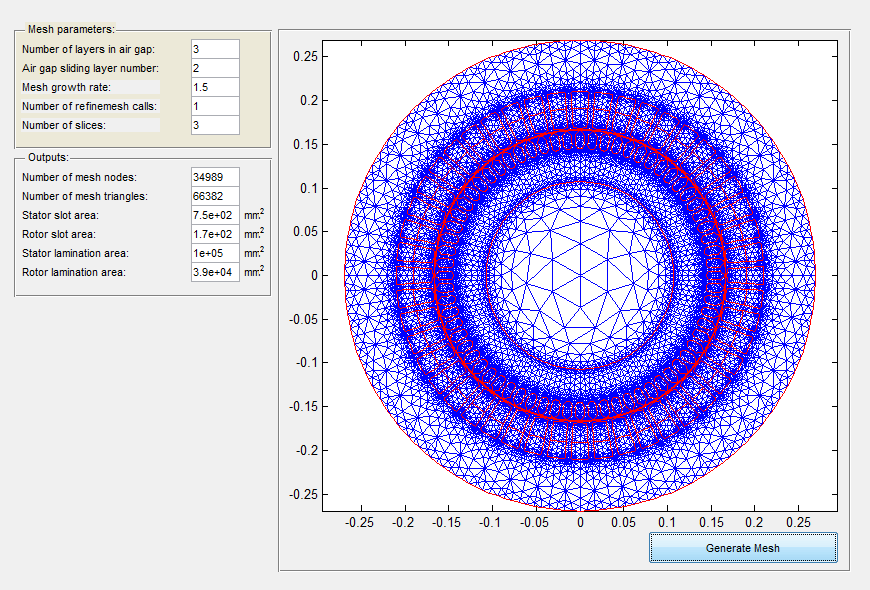

In [134]:
from IPython.display import Image
Image(filename='image/mesh.png')

### General Settings

Project2_P.mat: Parameter file

Project2_S.mat: Simulation file (Open As a New Simulation)

Simulation script file: No simulation script

Solver type: Fast

Simulation data saving period: 1 step

Extended data saving in "data" folder

Time step: 0.001 s

Convergence tolerance: 0.01

Simulation stop time: 0.02 s

Supply frequency: 60 Hz

Supply voltage: 200 V

Load: 0 Nm

Moment of inertia:

In [135]:
J=0.5*math.pi*math.pow(Dre,2.0)/4.0*L*7650*math.pow(Dre/2.0,2.0) # (kg.m^2)
print J

3.59152077012


Torque calculation method: Maxwell stress tensor

Rotor radial force calculation: Checked

Display outputs in Matlab Command Window

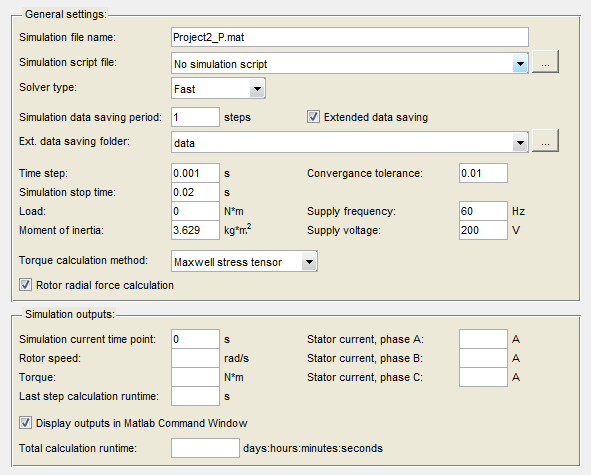

In [136]:
from IPython.display import Image
Image(filename='image/general.png')

## Koil Simulation

The winding factors for several harmonics and mmf waveforms were acquired by the Koil software.

### Winding Drawing

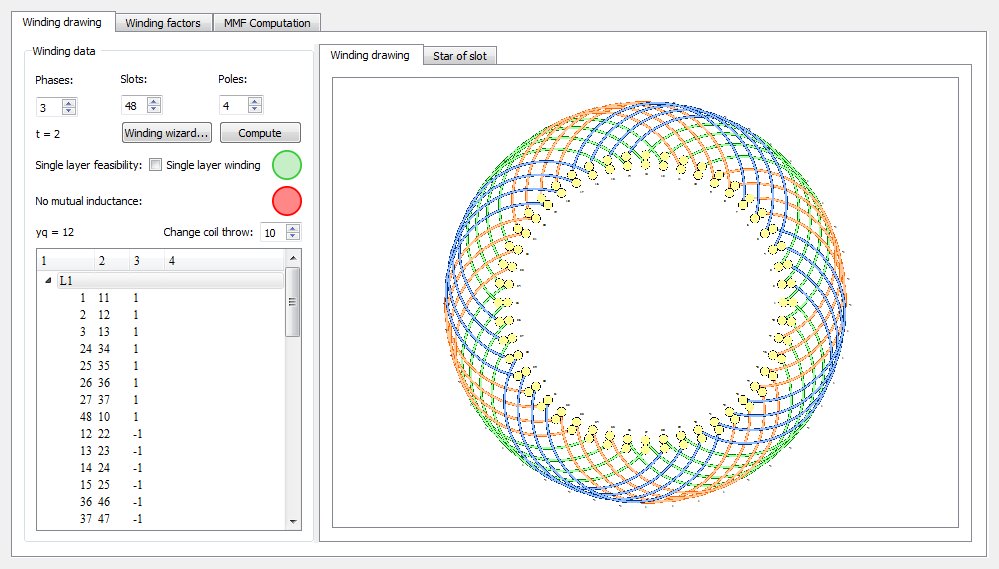

In [137]:
from IPython.display import Image
Image(filename='image/koilwinding.png')

### Winding Factors

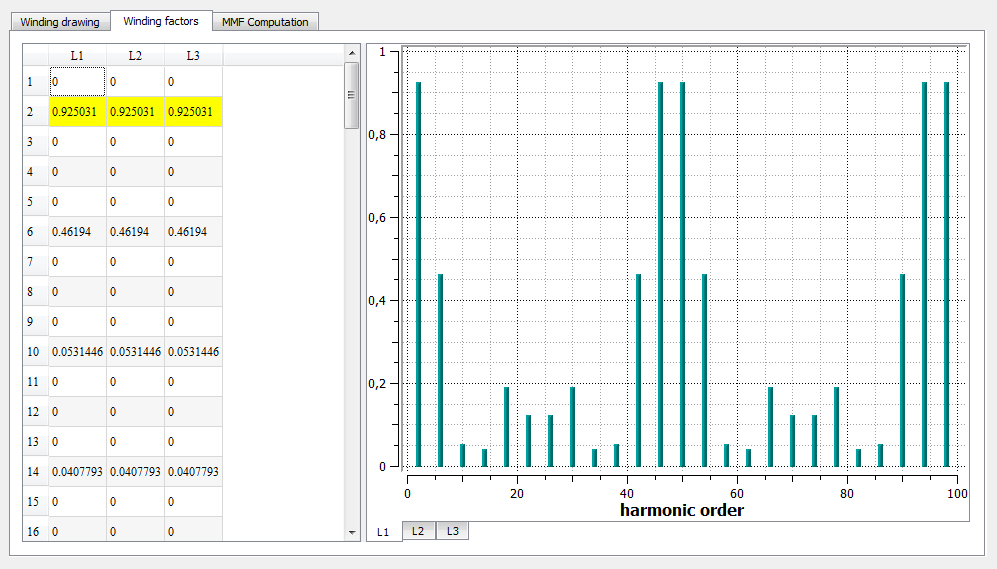

In [138]:
from IPython.display import Image
Image(filename='image/koilfactors.png')

### MMF Computation

Index of rotor losses:

In [143]:
f=f1 # Stator supply frequency (Hz)
print f1 
D=Dis # The airgap diameter of the machine(m)
print D
ws=(bs1+bs2)/2.0 # The slot opening (m)
print ws
print g # The airgap (m)
sigma=1/(52e-8) # Conductivity of NO20 Sura (S/m)
print sigma
print mu_lin # Relative permeability of NO20 Sura

60.0
0.333821719418
0.0182324030329
0.000875596488411
1923076.92308
11551.5684502


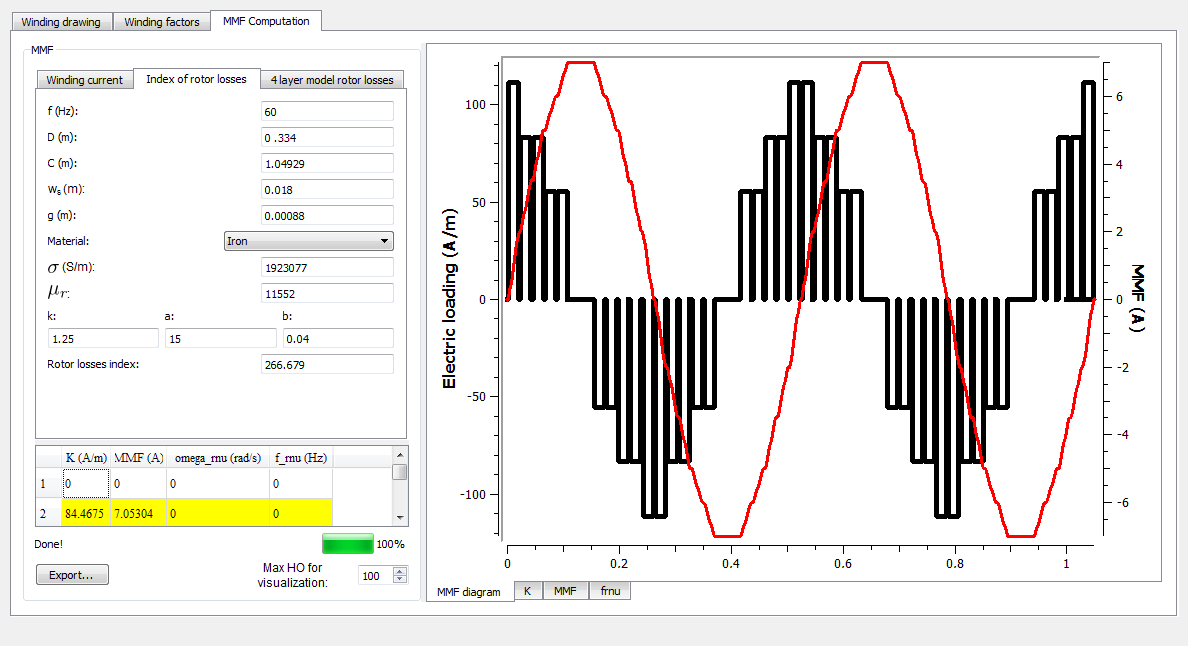

In [144]:
from IPython.display import Image
Image(filename='image/koilmmfdiag.png')

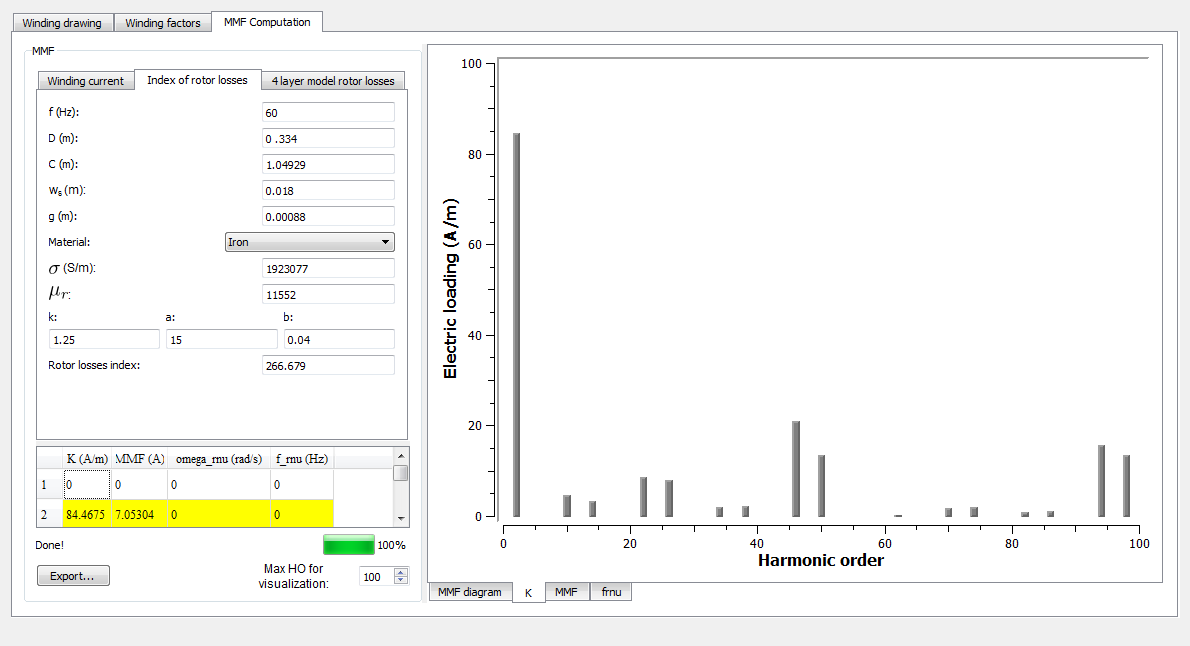

In [145]:
from IPython.display import Image
Image(filename='image/koilk.png')

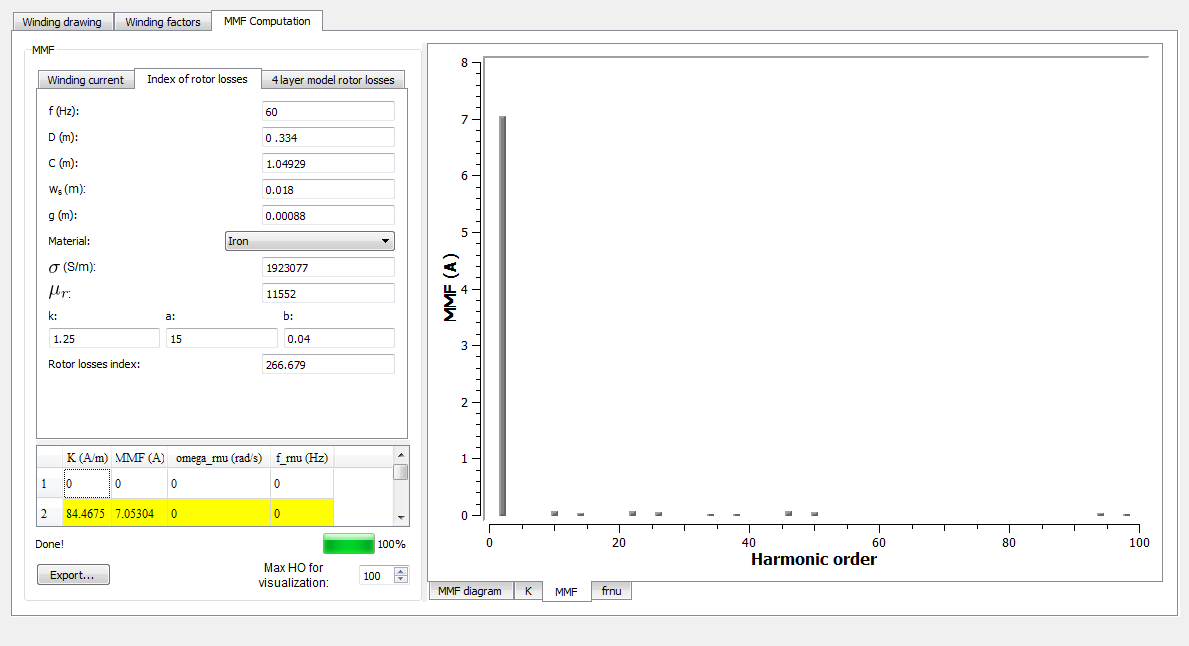

In [146]:
from IPython.display import Image
Image(filename='image/koilmmf.png')

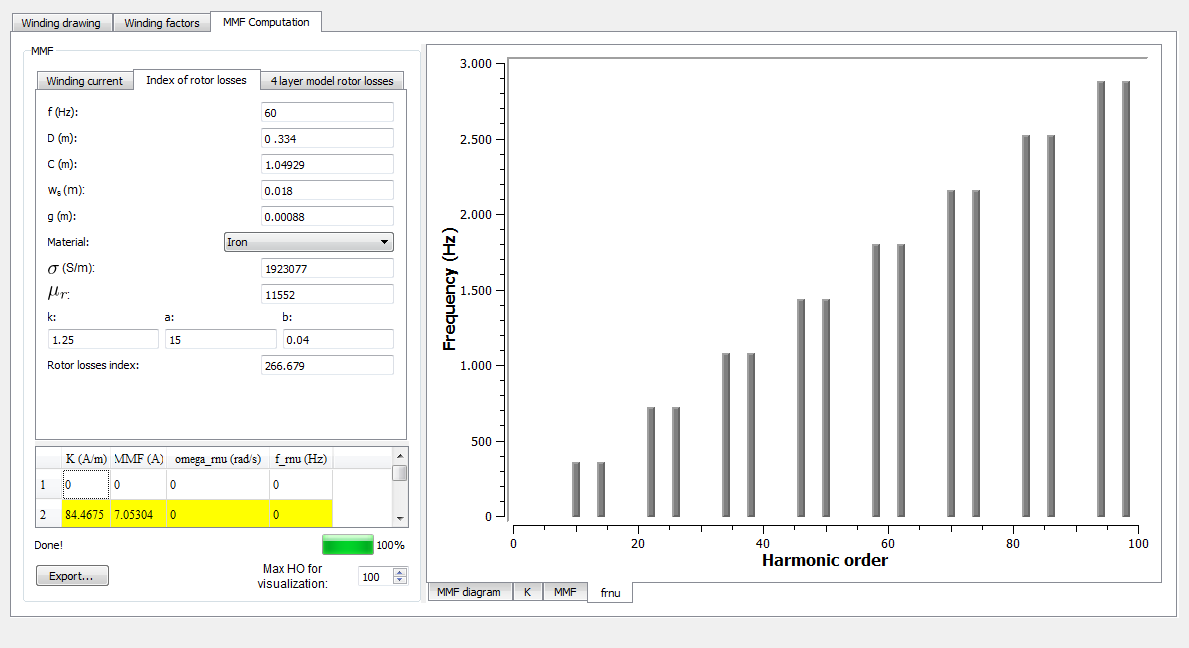

In [147]:
from IPython.display import Image
Image(filename='image/koilfrnu.png')

## Conclusion

## References